<a href="https://colab.research.google.com/github/Hira1445/Hira_Khan/blob/main/Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# PreProcessing

In [ ]:
import tensorflow as tf
import keras as keras

In [ ]:
from keras.datasets import cifar10

In [ ]:
#import cifar10 dataset from keras from tensorflow keras 
#and storing it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_pred_test = y_test

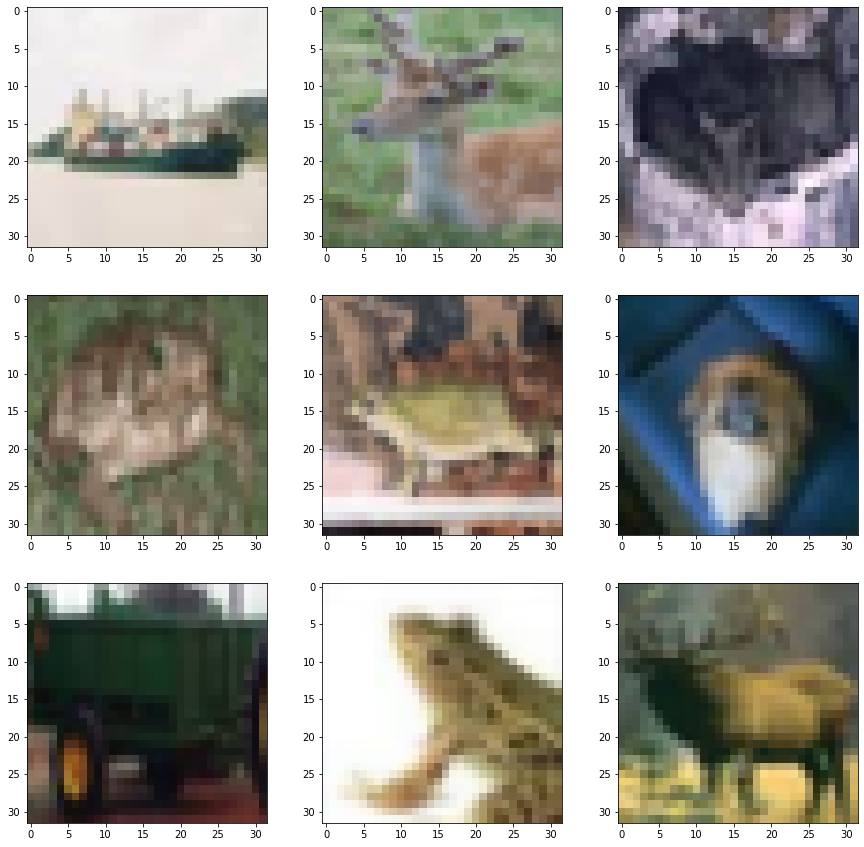

In [ ]:
#Viewing Images
import random
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[random.randint(0,50000)])

In [ ]:
x_train.shape


(50000, 32, 32, 3)

## Image Preprocess

### Scaling Images from **0 to 255 to 0 to 1**

In [ ]:
x_test[0].max()

255

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

## Label Preprocessing

In [ ]:
#Before preprocessing into Binary Classification metric array
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train,num_classes=10 )

In [ ]:
y_test = to_categorical(y_test,num_classes=10 )

In [ ]:

#After Turing into bindary matrics of single array perlabel 
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential()

#Adding layers
#Adding conv and pool
model.add(Conv2D(filters=32,  kernel_size=(4,4), activation='relu' ,input_shape=(32, 32, 3)  ))
model.add( MaxPool2D(pool_size=(2,2) ))
model.add(Dropout(0.2) )

model.add(Conv2D(filters=32,  kernel_size=(4,4), activation='relu' ,input_shape=(32, 32, 3)  ))
model.add( MaxPool2D(pool_size=(2,2) ))
model.add(Dropout(0.2) )

#Adding Flatten
model.add(Flatten())

#Adding dense layer
model.add(Dense(256,activation='relu'))

#Output
model.add(Dense(10,activation = 'softmax'))

In [ ]:
# model = Sequential()

# model.add(Conv2D(filters= 64, kernel_size= (3,3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPool2D(2, 2),)



# model.add(Flatten(),)

# model.add(Dense(512, activation='relu'),)
# #output
# model.add(Dense(100, activation='softmax'))

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [ ]:
#Compile
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#Early Stops
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_loss',patience=2,verbose=1)


In [ ]:
#Fitting
model.fit(x=x_train,
    y=y_train,
    epochs=25,
    callbacks=[stop],
          validation_data=(x_test,y_test))

Epoch 1/25
1563/1563 [==============================] - 66s 30ms/step - loss: 1.5534 - accuracy: 0.4349 - val_loss: 1.3127 - val_accuracy: 0.5252
Epoch 2/25
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2586 - accuracy: 0.5530 - val_loss: 1.1287 - val_accuracy: 0.6020
Epoch 3/25
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1179 - accuracy: 0.6059 - val_loss: 1.0495 - val_accuracy: 0.6361
Epoch 4/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0292 - accuracy: 0.6366 - val_loss: 0.9917 - val_accuracy: 0.6598
Epoch 5/25
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9481 - accuracy: 0.6671 - val_loss: 0.9666 - val_accuracy: 0.6638
Epoch 6/25
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8826 - accuracy: 0.6897 - val_loss: 0.9200 - val_accuracy: 0.6773
Epoch 7/25
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8289 - accuracy: 0.7088 - val_loss: 0.9159 -

## Testing

In [ ]:
import pandas as pd

In [ ]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

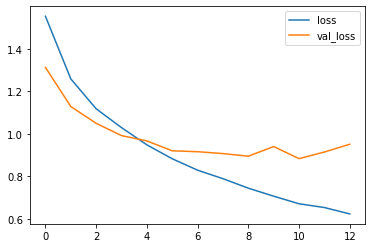

In [ ]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

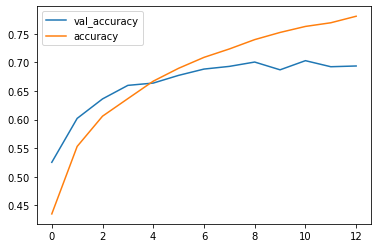

In [ ]:
loss[['val_accuracy','accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#predict on xtest
pred = model.predict_classes(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_pred_test , pred))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74      1000
           1       0.83      0.80      0.82      1000
           2       0.74      0.47      0.57      1000
           3       0.54      0.45      0.49      1000
           4       0.57      0.74      0.64      1000
           5       0.53      0.68      0.60      1000
           6       0.80      0.74      0.77      1000
           7       0.64      0.83      0.72      1000
           8       0.79      0.80      0.79      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



In [ ]:
print(confusion_matrix(y_pred_test , pred))

[[684  23  26  28  38  18  14  41  95  33]
 [ 13 798   5  15  12  12  16  16  39  74]
 [ 58   6 465  66 146 117  49  70  13  10]
 [ 15   7  31 449 102 247  45  82  12  10]
 [ 11   3  31  47 737  49  23  90   7   2]
 [  6   2  23 109  68 678  15  89   5   5]
 [  5   6  18  56  96  49 742  23   2   3]
 [  4   0  13  21  56  63   3 829   4   7]
 [ 40  36  14  14  22  24   8  17 799  26]
 [ 21  76   3  23  11  11  14  46  39 756]]


<AxesSubplot:>

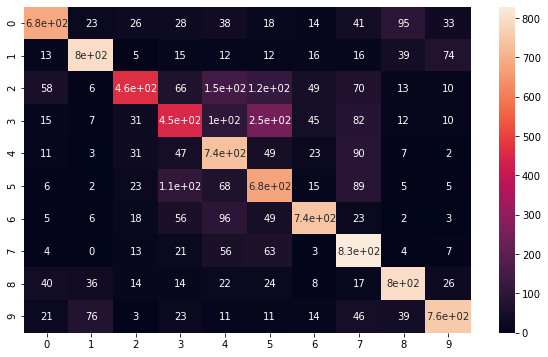

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_pred_test , pred  , ),annot =True)

#Confusion between cat and dog

## Custom Data

In [ ]:
classes = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4: "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck",
    
}

In [ ]:
#Real data in dataset
test = x_test[88]

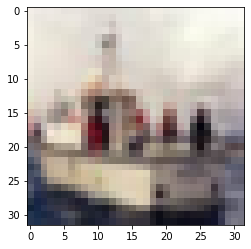

In [ ]:
plt.imshow(test)

In [ ]:
#Our predictions
answer1 = model.predict_classes(test.reshape(1,32,32,3))


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
classes[int(answer1)]

'ship'

In [ ]:
#real predict
answer2 =y_pred_test[88]

In [ ]:
classes[int(answer2)]

'ship'

# SaveModel

In [ ]:
model.save("Cifar10.h5")